# Table of Contents

$\qquad \bullet$ [Data ETL](#load_data)<br>
$\qquad \bullet$ [Data Visualization](###Data_Visualization)<br>

# Data ETL

In [1]:
# imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()


Bad key text.latex.unicode in file C:\Users\fabio\anaconda3\envs\fastai-cpu-v0.7\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file C:\Users\fabio\anaconda3\envs\fastai-cpu-v0.7\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key pgf.debug in file C:\Users\fabio\anaconda3\envs\fastai-cpu-v0.7\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 444 ('pgf.debug           : False')
You probably need to get an

In [2]:
# Get dataset, originally from: https://archive-beta.ics.uci.edu/ml/datasets/diabetes+130+us+hospitals+for+years+1999+2008
raw_data_mappings = "https://raw.githubusercontent.com/F4LLC0N3R/IntroToAI/main/IDs_mapping.csv"
raw_data_diabetes = "https://raw.githubusercontent.com/F4LLC0N3R/IntroToAI/main/diabetic_data.csv"

df_mappings = pd.read_csv(raw_data_mappings)
df_diabetes = pd.read_csv(raw_data_diabetes)


In [3]:
df_diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
# count NA values, which are represented with '?'
df_diabetes.isin(['?']).sum(axis=0)

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [6]:
# show percentage of NA values
df_diabetes.isin(['?']).sum(axis=0)/len(df_diabetes)*100

encounter_id                 0.000000
patient_nbr                  0.000000
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

## Data Visualization
[Back to top](#plan)

- Correlation matrix heatmap

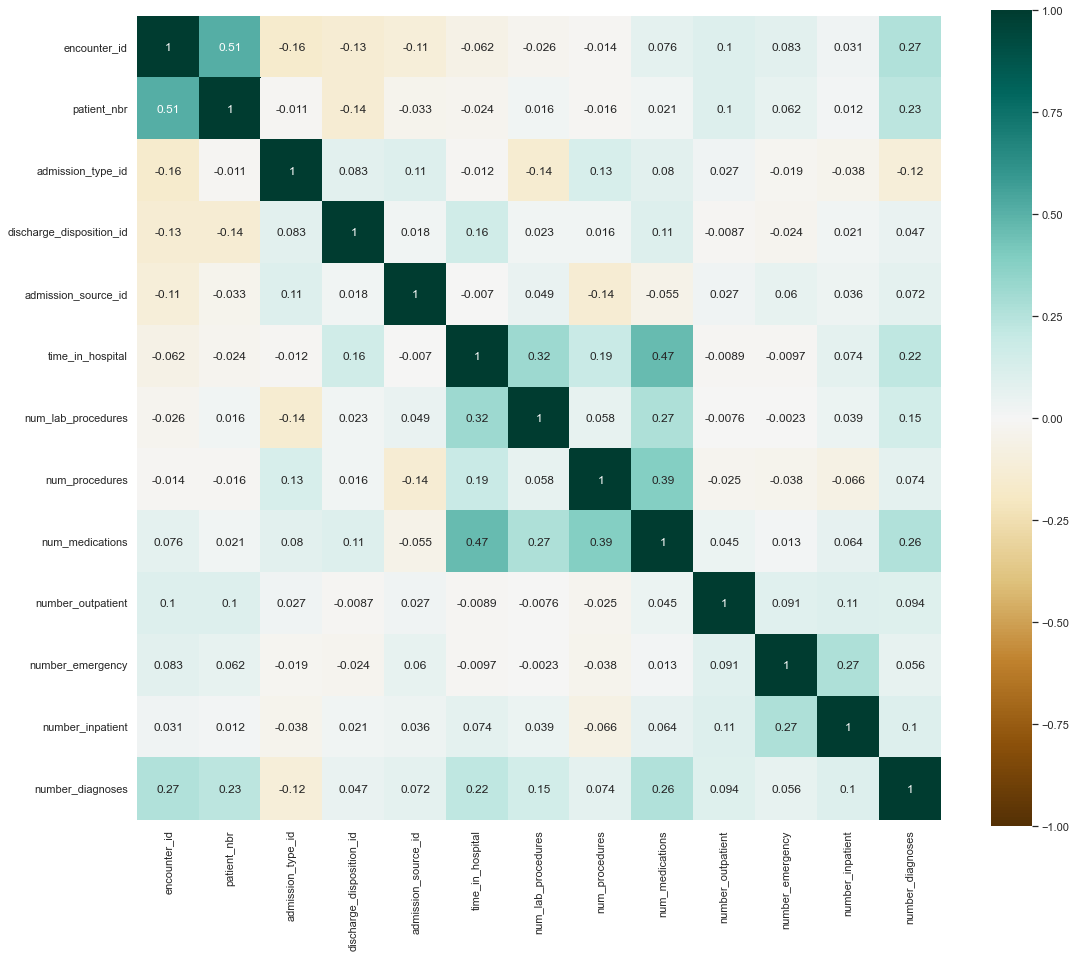

In [7]:
plt.figure(figsize=(18, 15))
sns.heatmap(df_diabetes.corr(), annot=True, vmin=-1, center=0,
            square=True,cmap='BrBG')
plt.savefig('corrmatrix_heatmap.png')
#df_diabetes.corr()["readmitted"].sort_values(ascending=False)

### Nominal data

- Target variable

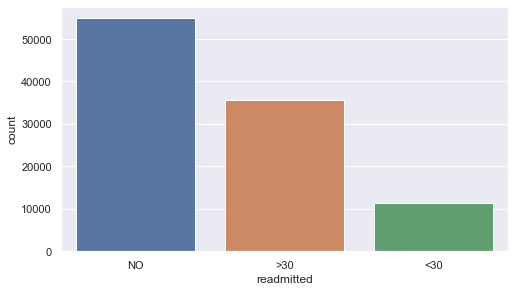

In [8]:
plt.figure(figsize=(8,4.5))
sns.countplot(data=df_diabetes, x='readmitted')
plt.savefig('plots/readmitted.png')

In [9]:
df_diabetes['readmitted_within_30_days'] = df_diabetes['readmitted'].replace(to_replace=['NO', '>30', '<30'], value=[0, 0, 1])

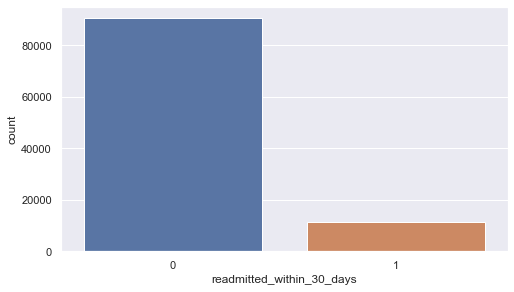

In [10]:
plt.figure(figsize=(8,4.5))
sns.countplot(data=df_diabetes, x='readmitted_within_30_days')
plt.savefig('plots/readmitted_within_30_days.png')

- Demographic features

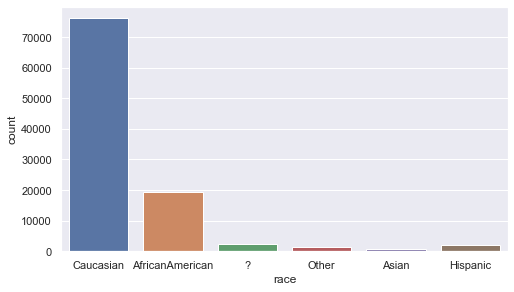

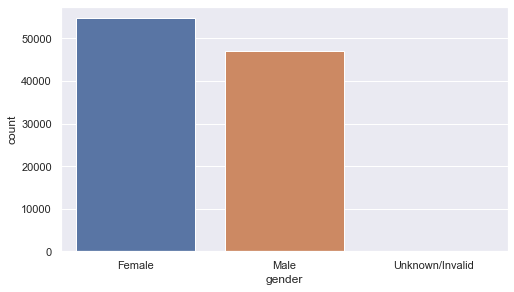

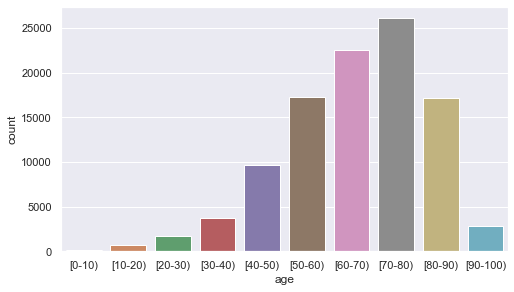

In [11]:
for col in ['race', 'gender', 'age']:
    plt.figure(figsize=(8,4.5))
    sns.countplot(data=df_diabetes, x=col)
    plt.savefig(f'plots/{col}.png')
    plt.show()

- Test results and medication decisions

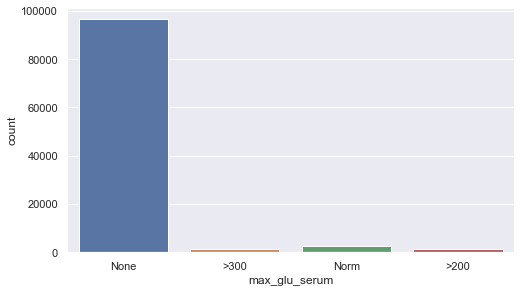

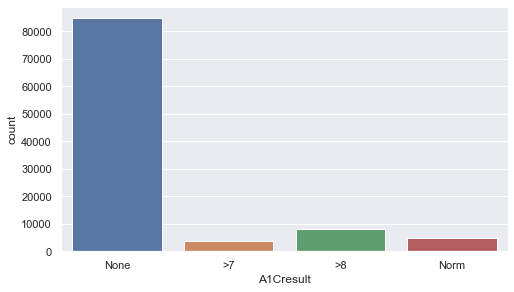

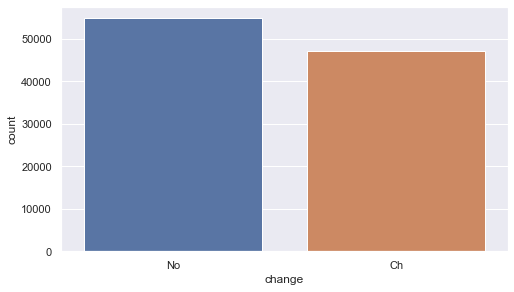

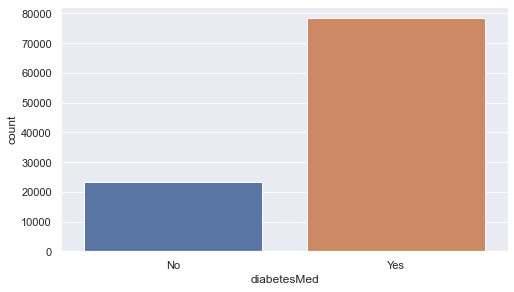

In [12]:
for col in ['max_glu_serum',
            'A1Cresult',
            'change',
            'diabetesMed']:
    plt.figure(figsize=(8,4.5))
    sns.countplot(data=df_diabetes, x=col)
    plt.savefig(f'plots/{col}.png')
    plt.show()

- 23 features for medications

In [13]:
medications = ['metformin',
               'repaglinide',
               'nateglinide',
               'chlorpropamide',
               'glimepiride',
               'acetohexamide',
               'glipizide',
               'glyburide',
               'tolbutamide',
               'pioglitazone',
               'rosiglitazone',
               'acarbose',
               'miglitol',
               'troglitazone',
               'tolazamide',
               'examide',
               'citoglipton',
               'insulin',
               'glyburide-metformin',
               'glipizide-metformin',
               'glimepiride-pioglitazone',
               'metformin-rosiglitazone',
               'metformin-pioglitazone'
              ]

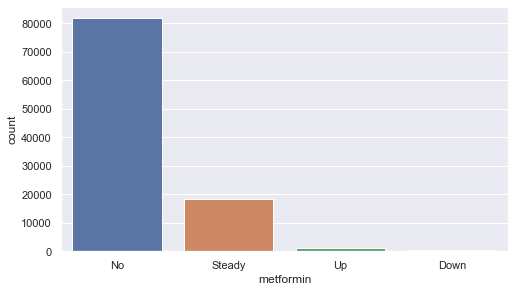

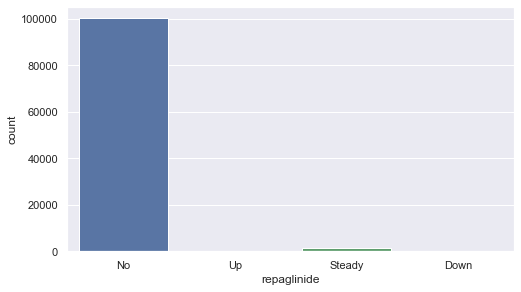

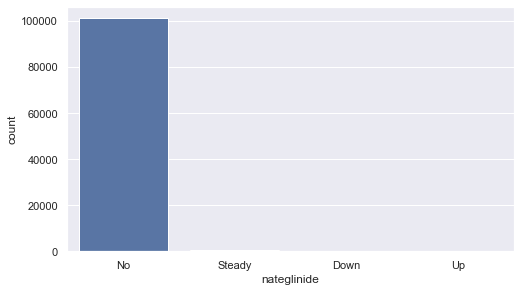

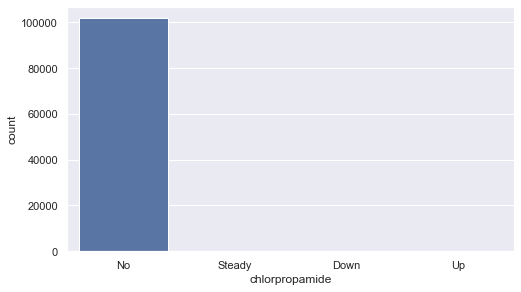

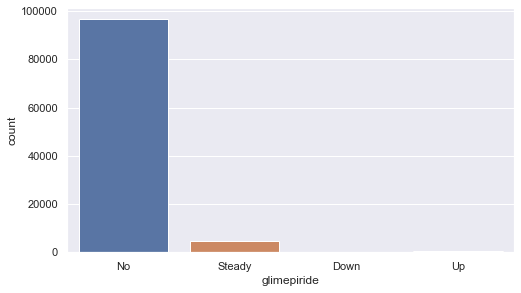

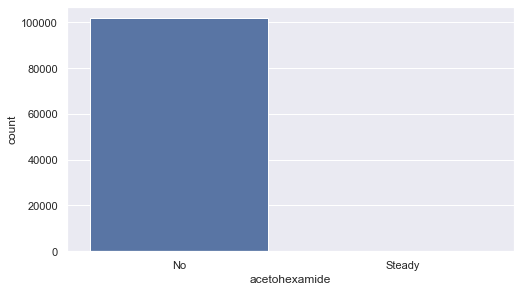

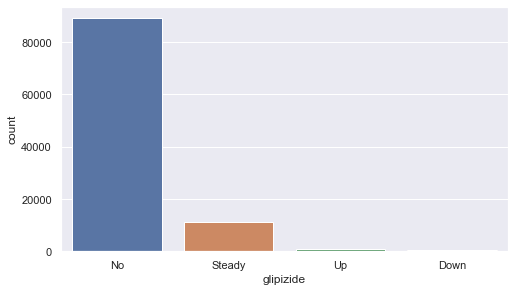

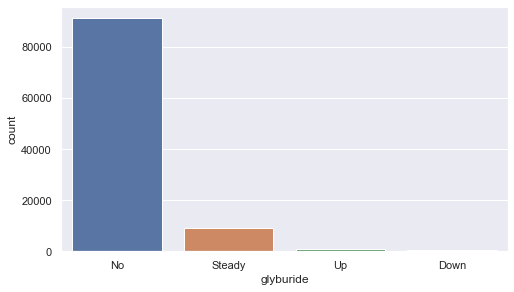

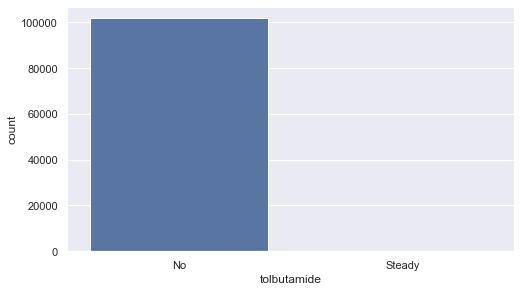

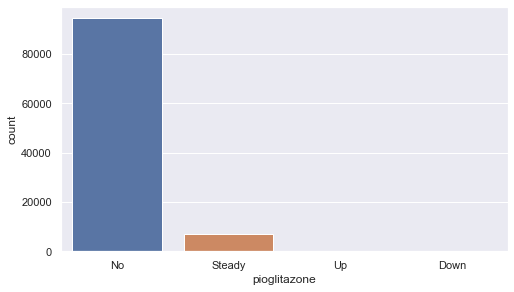

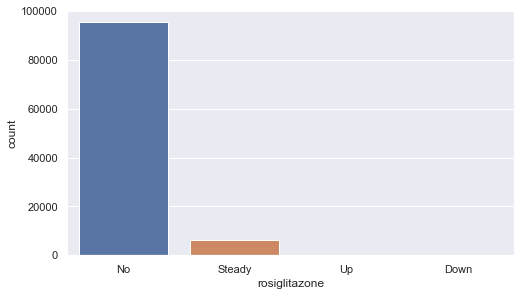

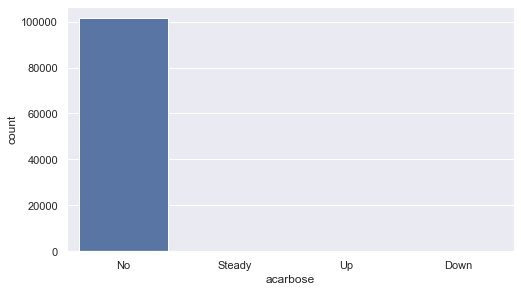

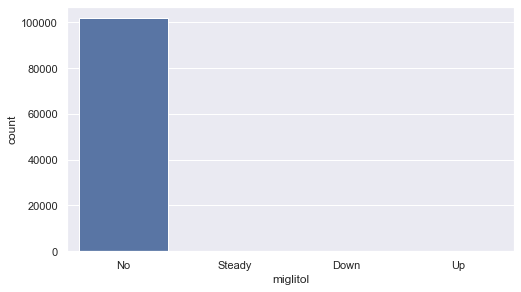

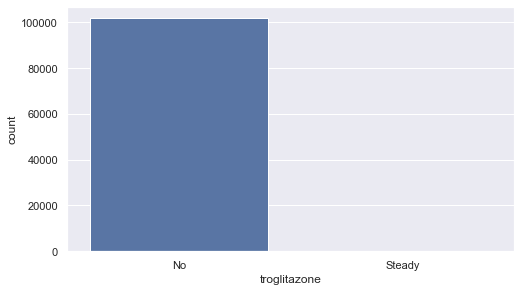

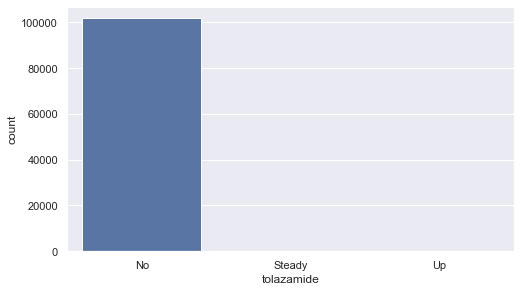

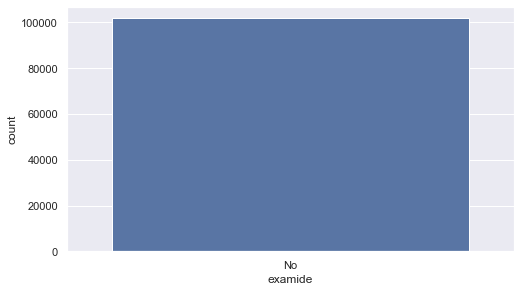

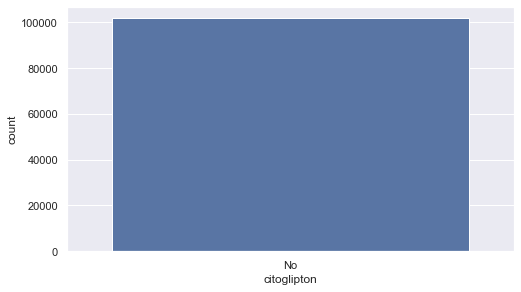

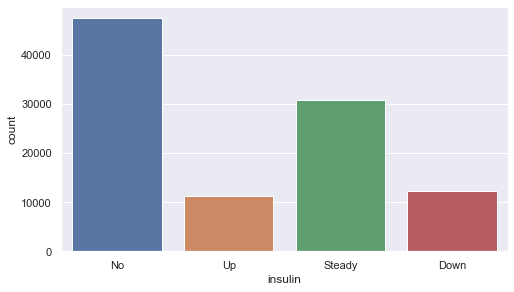

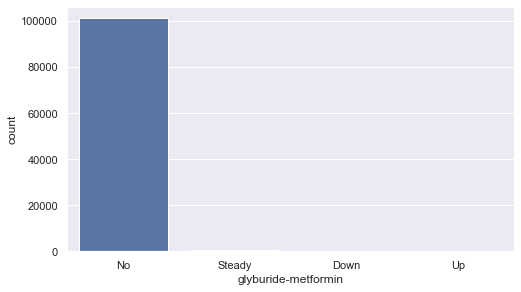

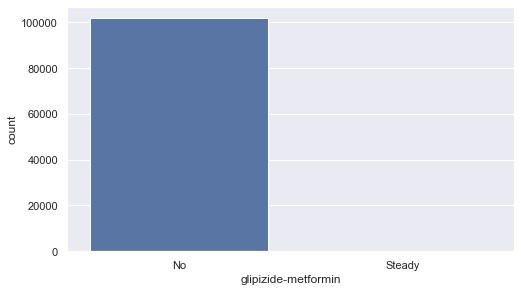

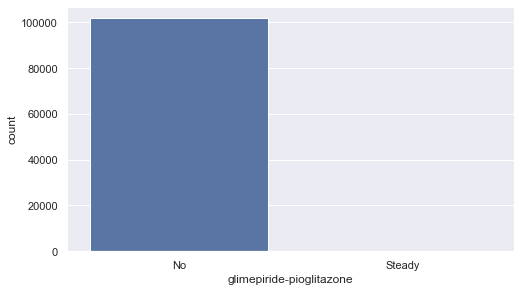

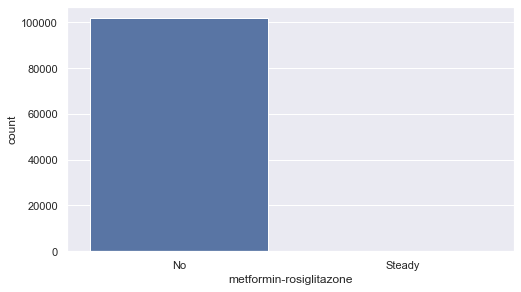

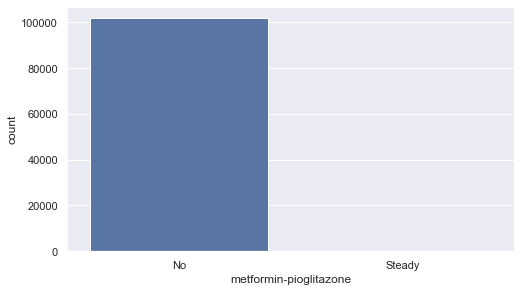

In [14]:
for col in medications:
    plt.figure(figsize=(8,4.5))
    sns.countplot(data=df_diabetes, x=col)
    plt.savefig(f'plots/medications/{col}.png')
    plt.show()

- Encoded nominal features

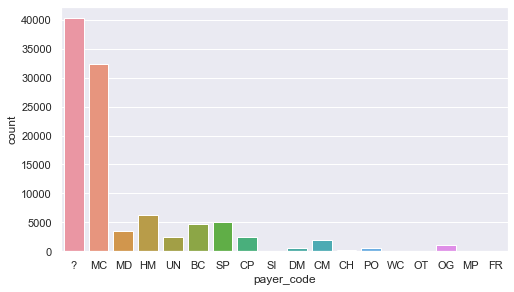

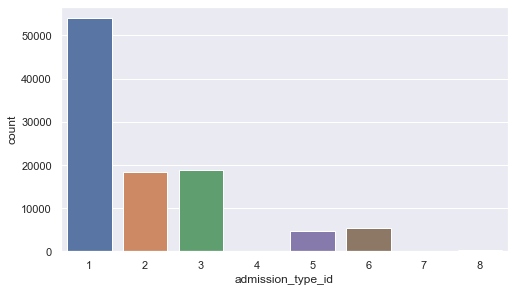

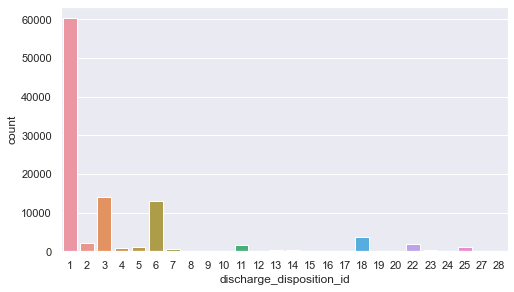

In [15]:
for col in ['payer_code',
            'admission_type_id',
            'discharge_disposition_id']:
    plt.figure(figsize=(8,4.5))
    sns.countplot(data=df_diabetes, x=col)
    plt.savefig(f'plots/{col}.png')
    plt.show()

- Encoded features with too many unique values (not plotted)

In [16]:
df_diabetes['medical_specialty'].nunique()

73

In [17]:
df_diabetes['diag_1'].nunique()

717

In [18]:
df_diabetes['diag_2'].nunique()

749

In [19]:
df_diabetes['diag_3'].nunique()

790

### Quantitative data

In [20]:
quantitative =['time_in_hospital', 
               'num_lab_procedures',
               'num_procedures',
               'num_medications',
               'number_outpatient', 
               'number_emergency',
               'number_inpatient',
               'number_diagnoses']

- Pairwise correlation / scatterplots

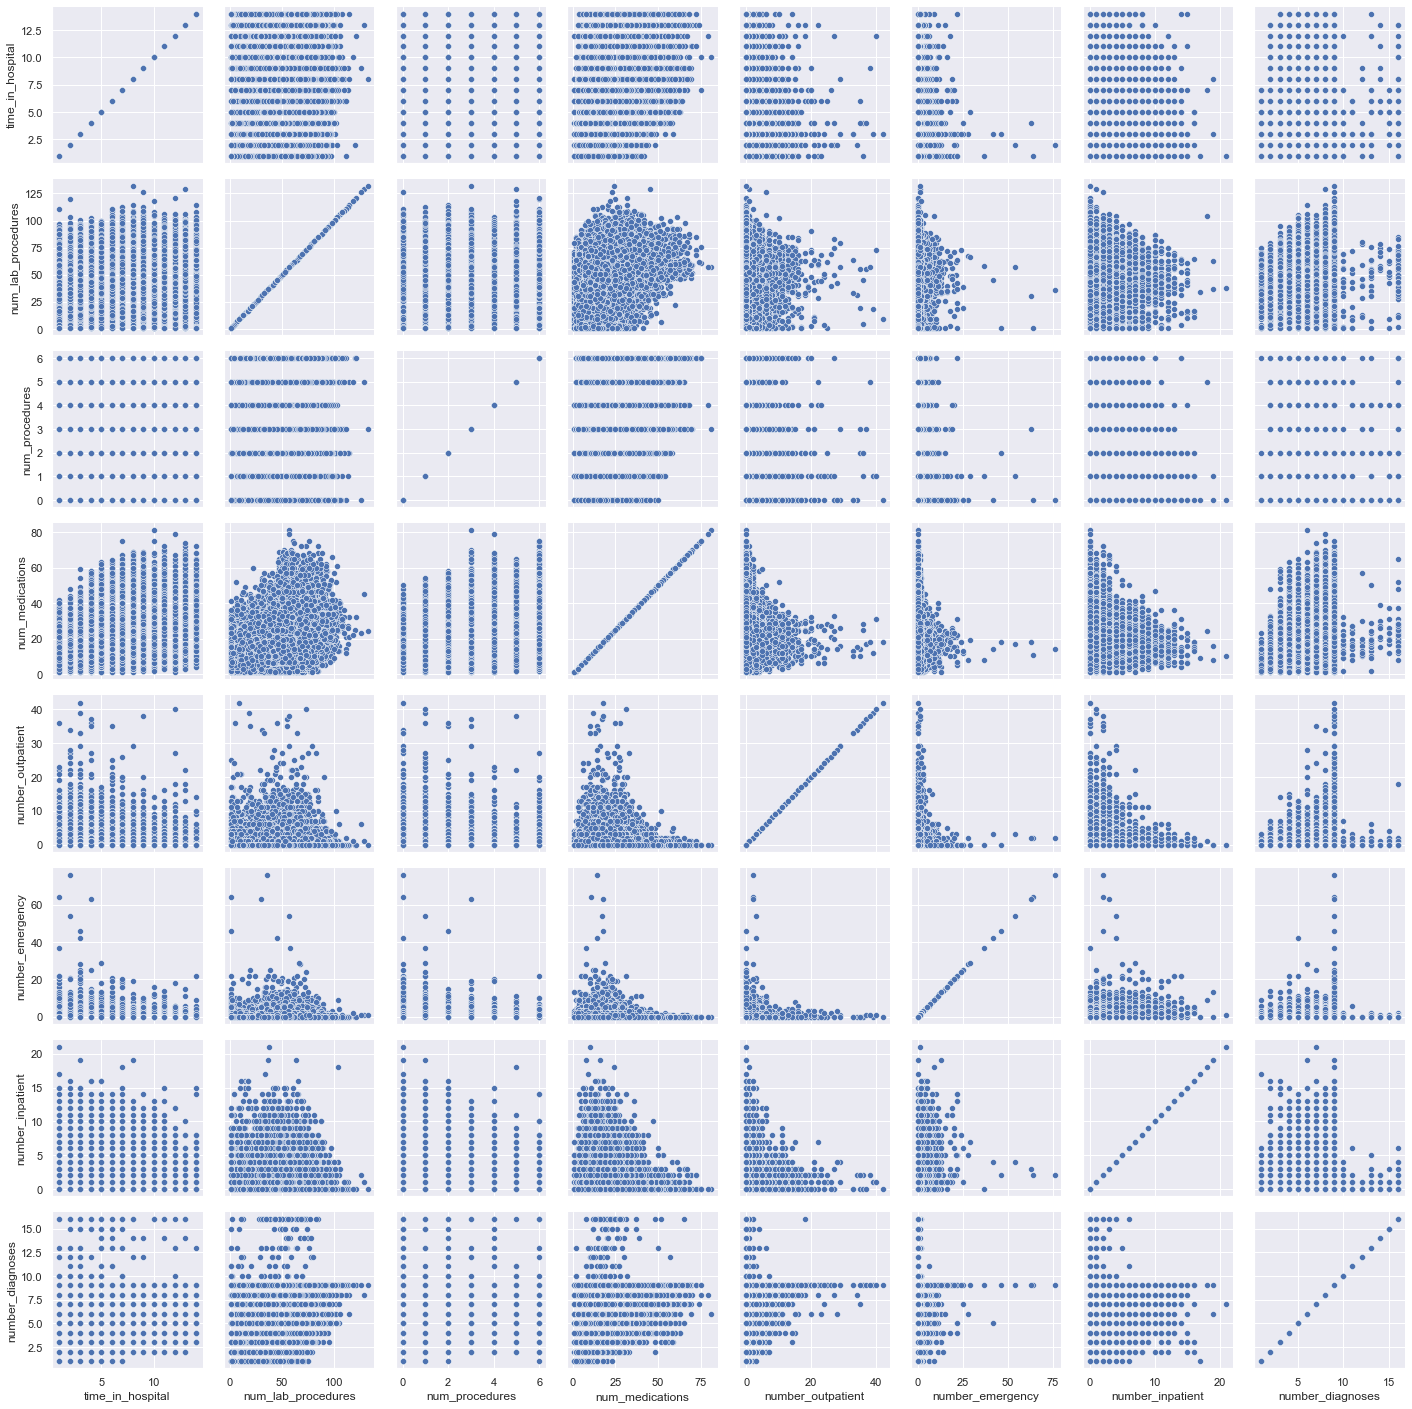

In [21]:
sns.PairGrid(df_diabetes[quantitative]).map(sns.scatterplot)

- Histograms

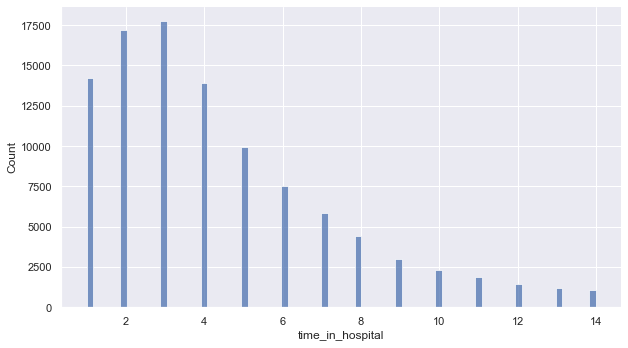

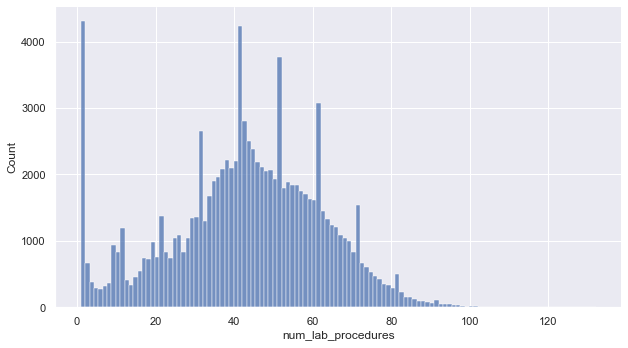

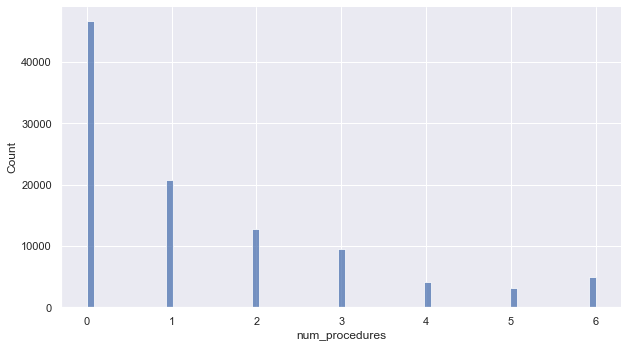

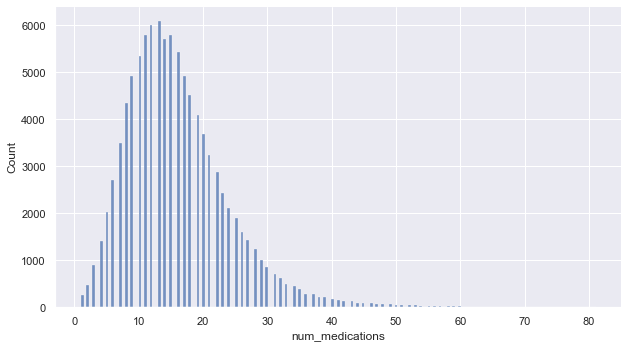

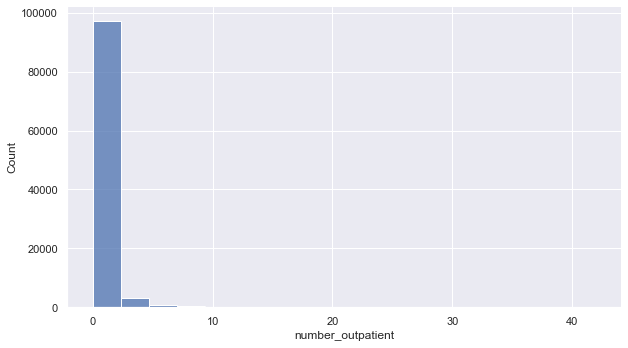

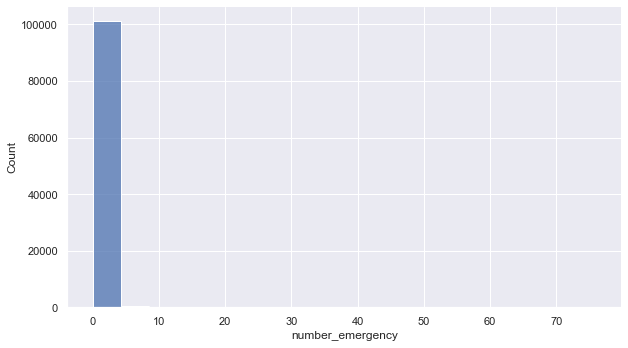

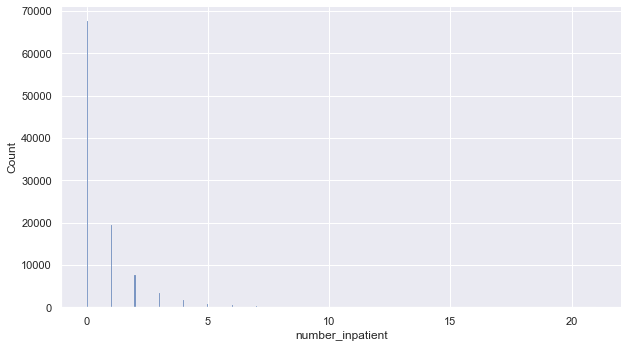

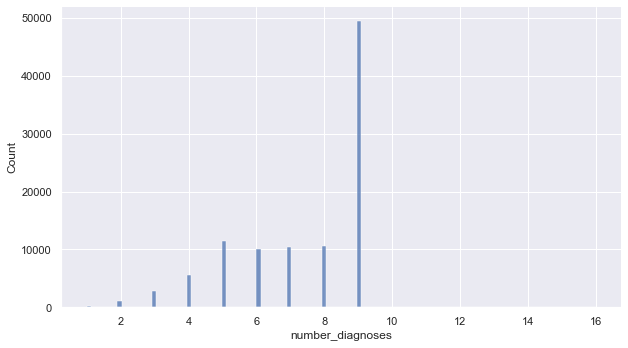

In [22]:
for col in quantitative:
    sns.displot(df_diabetes, x=col, aspect=16/9)
    plt.savefig(f'{col}.png')
    plt.show()

In [23]:
quantitative = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

- Boxplots

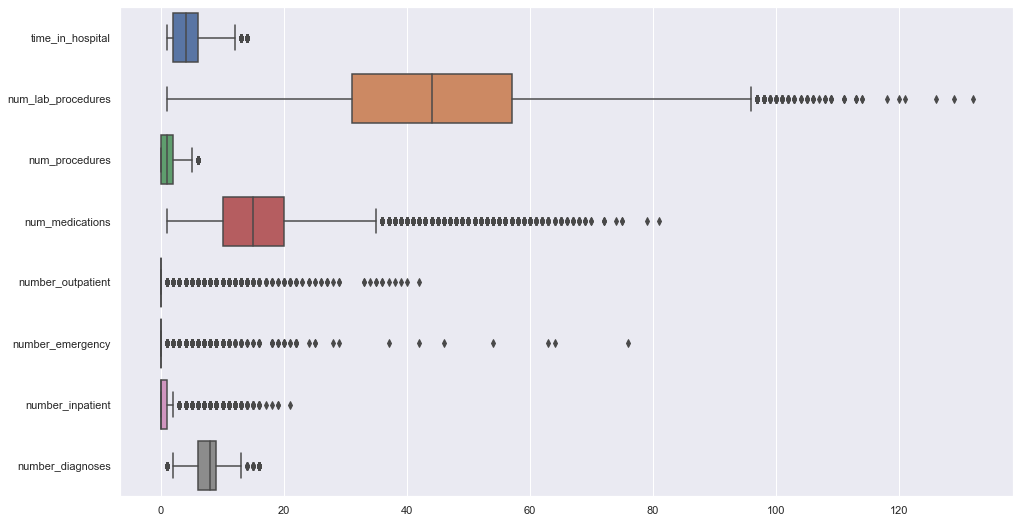

In [24]:
plt.figure(figsize=(16,9))
sns.boxplot(data=df_diabetes[quantitative], orient='h')
plt.savefig('plots/boxplots_quantitive_features.png')

In [25]:
df_diabetes['diag_1']

0         250.83
1            276
2            648
3              8
4            197
           ...  
101761    250.13
101762       560
101763        38
101764       996
101765       530
Name: diag_1, Length: 101766, dtype: object

# Section ...

In [26]:
# printing the coefficients and the p-values of the independent variables after running logistic regression

# import statsmodels.api as sm
# logit_model = sm.Logit(y_train, X_train)
# results = logit_model.fit(method='bfgs')
# print(results.summary())